# Publish data

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import netCDF4 as nc

import meop
import meop_publish
import meop_filenames
import meop_metadata
import meop_plot_data
from importlib import reload


In [11]:
reload(meop)
reload(meop_metadata)
reload(meop_filenames)
reload(meop_publish)

<module 'meop_publish' from '/media/disk2/roquet/MEOP_process/python/meop_publish.py'>

In [4]:
publicdir_CTD = meop_filenames.publicdir /meop_filenames.version
publicdir_CTD

PosixPath('/home/jupyter-froqu/MEOP_process/public/MEOP-CTD_2021-11-26')

In [71]:
# first create public folder
reload(meop_publish)
reload(meop)
meop_publish.publish_meop_ctd(publicdir_CTD, copydata=False, genplots=False, genmaps=False, compress=False, verbose=True)

In [12]:
lprofiles, ltags, ldeployments = meop_publish.load_list_profiles(publicdir_CTD, public=True, rebuild=False)

In [17]:
ltags = lprofiles.groupby('SMRU_PLATFORM_CODE').first()\
    .drop(['N_TEMP','N_PSAL','N_CHLA','CYCLE_NUMBER','year','month','day'],axis='columns')
ltags['JULD_END'] = lprofiles.groupby('SMRU_PLATFORM_CODE').max().JULD
ltags.rename(columns = {'JULD':'JULD_START'}, inplace = True)

In [23]:
qf = 'lr0'
wmo_list = []
for smru_name in ltags.index:
    list_fname = meop_filenames.list_fname_prof(smru_name=smru_name,qf=qf)
    for ncfile in list_fname:
        if ncfile.exists():
            with meop.open_dataset(ncfile) as ds:
                wmo = ds.wmo_platform_code
            wmo_list.append(wmo)
        else:
            wmo_list.append('')

[' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 'Q9900760',
 'Q9900757',
 'Q9900753',
 'Q9900754',
 'Q9900755',
 'Q9900756',
 'Q9900758',
 'Q9900759',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 'Q9900582',
 'Q9900583',
 'Q9900584',
 'Q9900585',
 'Q9900586',
 'Q9900587',
 'Q9900588',
 'Q9900589',
 'Q9900590',
 'Q9900591',
 'Q9900592',
 'Q9900594',
 'Q9900595',
 'Q9900596',
 'Q9900597',
 'Q9900598',
 'Q9900599',
 'Q9900642',
 'Q9900643',
 'Q9900644',
 'Q9900645',
 'Q9900646',
 'Q9900647',
 'Q9900648',
 'Q9900661',
 'Q9900664',
 'Q9900666',
 'Q9900667',
 'Q9900669',
 'Q9900670',
 'Q9900671',
 'Q9900662',
 'Q9900674',
 'Q9900663',
 'Q9900673',
 'Q9900665',
 'Q9900668',
 'Q9900672',
 'Q9900685',
 'Q9900654',
 'Q9900636',
 'Q9900688',
 'Q9900686',
 'Q9900689',
 'Q9900687',
 'Q9900637',
 'Q9900638',
 'Q9900655',
 'Q9900656',
 'Q9900656',
 'Q9900657',
 'Q9900657',
 'Q9900658',
 'Q9900675',
 'Q9900675',
 'Q9900676',
 'Q9900676',
 'Q9900677',
 'Q9900677',
 'Q9900678',
 'Q9900678',
 'Q9900679',


In [ ]:
list_smru_name=[]
for smru_name in ltags[ltags.wmo_platform_code==''].reset_index().SMRU_PLATFORM_CODE:
    if smru_name not in df[df.wmo_platform_code.isnull()]:
        list_smru_name.append(smru_name)
list_smru_name

In [114]:
ltags

,DEPLOYMENT_CODE,JULD_START,LATITUDE,LONGITUDE,MASK,COUNTRY,JULD_END,wmo_platform_code,year
SMRU_PLATFORM_CODE,,,,,,,,,
awru1-A-06,awru1,2007-03-03 03:24:00,-68.5139,78.3736,Southern Ocean,AUSTRALIA,2007-07-16 09:47:00,,2007
awru1-B-06,awru1,2007-03-04 19:40:00,-68.4296,78.4134,Southern Ocean,AUSTRALIA,2007-10-01 09:16:00,,2007
awru1-C-06,awru1,2007-03-02 18:14:00,-68.4895,78.3249,Southern Ocean,AUSTRALIA,2007-09-06 06:00:59,,2007
bs1-53127-04,bs1,2004-10-15 11:01:00,-54.0183,-38.2190,Southern Ocean,UK,2004-11-18 18:56:00,,2004
bs1-53128-04,bs1,2004-10-11 18:19:00,-54.2359,-39.0737,Southern Ocean,UK,2004-11-09 15:28:00,,2004
...,...,...,...,...,...,...,...,...,...
wd10-678-17,wd10,2017-11-28 11:00:00,-66.5959,140.0797,Southern Ocean,FRANCE,2017-12-05 11:00:00,,2017
wd10-679-17,wd10,2017-11-09 09:19:59,-66.6216,140.1138,Southern Ocean,FRANCE,2017-12-19 14:00:00,Q9901007,2017
wd10-681-17,wd10,2017-11-21 15:10:00,-66.6219,140.1069,Southern Ocean,FRANCE,2017-12-27 14:20:00,Q9901010,2017


In [174]:
df = pd.read_json('~/disk2_roquet/RAW_MEOP_DATA/config_files/platform2.json')
df

,platform_code,wmo_platform_code,smru_platform_code,deployment_code,species,time_coverage_start,time_coverage_end,location,firmware_version,firmware_parameters,instr_id,ptt,loc_algorithm,dt_created,dt_modified
0,10320,NaN,wd1-9497-06,wd1,Weddell seal,2006-02-14T00:00:00Z,2006-11-01T00:00:00Z,Davis,44,WEDD_05A,9497,19251,L,2012-04-20T10:34:52Z,2016-03-08T19:01:02Z
1,10332,NaN,bs2-53130-05,bs2,Fur seal,2006-10-19T00:00:00Z,2007-05-01T00:00:00Z,Heard Island,44,FURR_05A,10286,53130,L,2012-04-20T10:34:52Z,2016-03-08T19:01:02Z
2,10338,NaN,ct10r-24176-05,ct10r,Northern elephant seal,2005-02-01T00:00:00Z,2005-06-01T00:00:00Z,California,37,CTD_04CX,10059,924176,L,2012-04-20T10:34:52Z,2019-03-11T14:41:04Z
3,10344,NaN,ct10r-24178-05,ct10r,Northern elephant seal,2005-02-01T00:00:00Z,2005-06-01T00:00:00Z,California,37,CTD_04CX,10057,924178,L,2012-04-20T10:34:52Z,2019-03-11T14:41:04Z
4,10350,NaN,ct10r-25966-05,ct10r,Northern elephant seal,2005-02-01T00:00:00Z,2005-07-01T00:00:00Z,California,37,CTD_04CX,10061,925966,L,2012-04-20T10:34:52Z,2019-03-11T14:41:04Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072,89334,1314.0,ct157-C216-20,ct157,Southern elephant seal,2019-12-24T00:00:00Z,None,Kerguelen,216,CTD_GEN_18C,15216,197009,K,2019-10-28T12:28:15Z,2020-01-16T11:27:35Z
2073,89340,1315.0,ct157-C213-20,ct157,Southern elephant seal,2020-01-03T00:00:00Z,None,Kerguelen,216,CTD_GEN_18C,15213,197010,K,2019-10-28T12:28:38Z,2020-02-19T11:06:49Z
2074,89346,1300.0,ct157-C212-20,ct157,Southern elephant seal,2019-12-24T00:00:00Z,None,Kerguelen,216,CTD_GEN_18C,15212,197011,K,2019-10-28T12:30:24Z,2020-01-06T12:58:17Z
2075,89352,1319.0,ct157-C211-20,ct157,Southern elephant seal,2020-01-03T00:00:00Z,None,Kerguelen,216,CTD_GEN_18C,15211,197012,K,2019-10-28T12:30:28Z,2020-02-19T11:06:27Z


In [173]:
df = pd.read_json('~/disk2_roquet/RAW_MEOP_DATA/config_files/platform2.json')
#df2 = pd.read_json('~/disk2_roquet/RAW_MEOP_DATA/config_files/platform2_patch.json')
#df = pd.concat([df1,df2])
df = df[['smru_platform_code','wmo_platform_code']][~df.wmo_platform_code.isnull()].drop_duplicates()
df = df.rename(columns={'smru_platform_code':'SMRU_PLATFORM_CODE'}).set_index('SMRU_PLATFORM_CODE')
df

,wmo_platform_code
SMRU_PLATFORM_CODE,
ct37-757-08,80.0
ct37-780-08,83.0
ct37-762-08,81.0
ct37-765-08,82.0
ct37-810-08,86.0
...,...
ct157-C216-20,1314.0
ct157-C213-20,1315.0
ct157-C212-20,1300.0


In [172]:
df

,wmo_platform_code
SMRU_PLATFORM_CODE,
ct37-757-08,80
ct37-780-08,83
ct37-762-08,81
ct37-765-08,82
ct37-810-08,86
...,...
ct159-943-BAT-19,Q9901404
ct159-969-BAT-18,Q9901425
ct159-051-BAT-19,Q9901405


In [170]:
list_wmo=[]
for smru_name in ltags.index:
    #print(smru_name)
    if smru_name in df.index:
        list_wmo.append(df.loc[smru_name,'wmo_platform_code'])
    else:
        list_wmo.append(str(ltags.loc[smru_name,'wmo_platform_code']))
    
    #if smru_name not in df[df.wmo_platform_code.isnull()]:
    #    list_smru_name.append(smru_name)
#list_smru_name

list_wmo

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 760.0,
 757.0,
 753.0,
 754.0,
 755.0,
 756.0,
 758.0,
 759.0,
 '',
 '',
 '',
 '',
 '',
 '',
 582.0,
 583.0,
 584.0,
 585.0,
 586.0,
 587.0,
 588.0,
 589.0,
 590.0,
 591.0,
 592.0,
 594.0,
 595.0,
 596.0,
 597.0,
 598.0,
 599.0,
 642.0,
 643.0,
 644.0,
 645.0,
 646.0,
 647.0,
 648.0,
 661.0,
 664.0,
 666.0,
 667.0,
 669.0,
 670.0,
 671.0,
 662.0,
 674.0,
 663.0,
 673.0,
 665.0,
 668.0,
 672.0,
 685.0,
 654.0,
 636.0,
 688.0,
 686.0,
 689.0,
 687.0,
 637.0,
 638.0,
 655.0,
 'Q9900656',
 'Q9900656',
 'Q9900657',
 'Q9900657',
 658.0,
 'Q9900675',
 'Q9900675',
 'Q9900676',
 'Q9900676',
 'Q9900677',
 'Q9900677',
 'Q9900678',
 'Q9900678',
 'Q9900679',
 'Q9900679',
 'Q9900659',
 'Q9900659',
 'Q9900660',
 'Q9900660',
 '',
 726.0,
 690.0,
 691.0,
 692.0,
 694.0,
 696.0,
 697.0,
 698.0,
 699.0,
 739.0,
 738.0,
 747.0,
 741.0,
 748.0,
 749.0,
 750.0,
 751.0,
 752.0,
 742.0,
 729.0,
 730.0,
 743.0,
 731.0,
 733.0,
 732.0,
 728.0,
 744.0,
 745.0,
 734.0

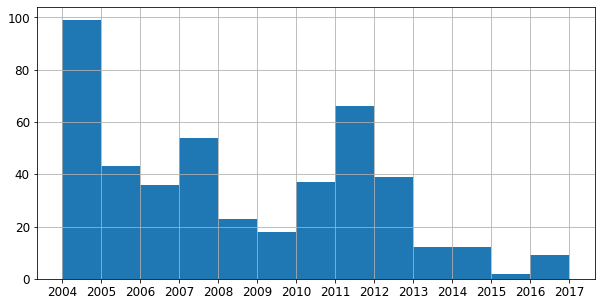

In [76]:
ltags['wmo_platform_code'] = wmo_list
ltags['year'] = [ltags.JULD_START[kk][:4] for kk in range(len(ltags))]
ltags[ltags.wmo_platform_code==''].year.sort_values().hist(bins=13,figsize=[10,5])

In [69]:
df['year'] = [df.time_coverage_start[kk][:4] for kk in range(len(df))]

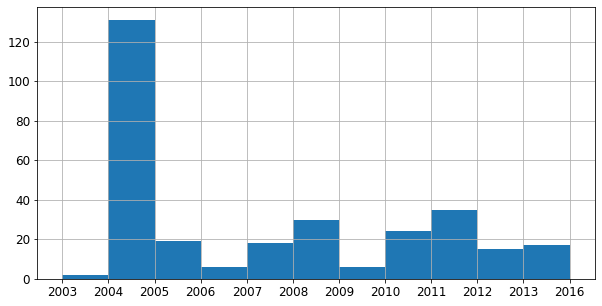

In [81]:
df[df.wmo_platform_code.isnull()].year.sort_values().hist(bins=11,figsize=[10,5])

In [101]:
ltags

,DEPLOYMENT_CODE,JULD_START,LATITUDE,LONGITUDE,MASK,COUNTRY,JULD_END,wmo_platform_code,year
SMRU_PLATFORM_CODE,,,,,,,,,
awru1-A-06,awru1,2007-03-03 03:24:00,-68.5139,78.3736,Southern Ocean,AUSTRALIA,2007-07-16 09:47:00,,2007
awru1-B-06,awru1,2007-03-04 19:40:00,-68.4296,78.4134,Southern Ocean,AUSTRALIA,2007-10-01 09:16:00,,2007
awru1-C-06,awru1,2007-03-02 18:14:00,-68.4895,78.3249,Southern Ocean,AUSTRALIA,2007-09-06 06:00:59,,2007
bs1-53127-04,bs1,2004-10-15 11:01:00,-54.0183,-38.2190,Southern Ocean,UK,2004-11-18 18:56:00,,2004
bs1-53128-04,bs1,2004-10-11 18:19:00,-54.2359,-39.0737,Southern Ocean,UK,2004-11-09 15:28:00,,2004
...,...,...,...,...,...,...,...,...,...
wd10-678-17,wd10,2017-11-28 11:00:00,-66.5959,140.0797,Southern Ocean,FRANCE,2017-12-05 11:00:00,,2017
wd10-679-17,wd10,2017-11-09 09:19:59,-66.6216,140.1138,Southern Ocean,FRANCE,2017-12-19 14:00:00,Q9901007,2017
wd10-681-17,wd10,2017-11-21 15:10:00,-66.6219,140.1069,Southern Ocean,FRANCE,2017-12-27 14:20:00,Q9901010,2017


In [104]:
list_smru_name=[]
for smru_name in ltags[ltags.wmo_platform_code==''].reset_index().SMRU_PLATFORM_CODE:
    if smru_name not in df[df.wmo_platform_code.isnull()]:
        list_smru_name.append(smru_name)
list_smru_name

['awru1-A-06',
 'awru1-B-06',
 'awru1-C-06',
 'bs1-53127-04',
 'bs1-53128-04',
 'bs1-53130-04',
 'bs2-53127-05',
 'bs2-53128-05',
 'bs2-53130-05',
 'ct1-Blitzen-04',
 'ct1-Comet-04',
 'ct1-Dancer-04',
 'ct1-Dasher-04',
 'ct1-Donner-04',
 'ct1-Vixen-04',
 'ct107-F954-14',
 'ct11-10064-05',
 'ct11-10096-05',
 'ct11-10097-05',
 'ct12-054-05',
 'ct12-098-05',
 'ct12-102-05',
 'ct12-107-05',
 'ct12-110-05',
 'ct13-059-05',
 'ct132-328F-16',
 'ct132-329-16',
 'ct132-331-16',
 'ct14-068-06',
 'ct14-103-06',
 'ct14-104-06',
 'ct14-105-06',
 'ct14-106-06',
 'ct14-111-06',
 'ct14-118-06',
 'ct14-175-06',
 'ct16-174-06',
 'ct16-238-06',
 'ct16-240-06',
 'ct16-241-06',
 'ct17-f100-06',
 'ct17-m007-06',
 'ct17-m070-06',
 'ct17-m098-06',
 'ct17-m110-06',
 'ct18-L-06',
 'ct19-054-06',
 'ct2-9916-04',
 'ct2-9919-04',
 'ct2-9920-04',
 'ct2-9925-04',
 'ct20-416-06',
 'ct20-417-06',
 'ct21-36-07',
 'ct21-37-07',
 'ct21-38-07',
 'ct21-39-07',
 'ct21-41-07',
 'ct21-GG178-07',
 'ct22-11-08',
 'ct22-17-08',


In [99]:
d1 = ltags[ltags.wmo_platform_code==''].reset_index()
d2 = df[df.wmo_platform_code.isnull()]
int_df = pd.merge(d1, d2, how='inner', on=['SMRU_PLATFORM_CODE', 'smru_platform_code'])

KeyError: 'SMRU_PLATFORM_CODE'

In [14]:
lprofiles.columns

Index(['DEPLOYMENT_CODE', 'SMRU_PLATFORM_CODE', 'CYCLE_NUMBER', 'JULD',
       'LATITUDE', 'LONGITUDE', 'N_TEMP', 'N_PSAL', 'N_CHLA', 'year', 'month',
       'day', 'MASK', 'COUNTRY'],
      dtype='object')

In [134]:
lprofiles, ltags, ldeployments = meop_publish.load_list_profiles(publicdir_CTD, public=False, rebuild=False)

In [137]:
ltags

,SMRU_PLATFORM_CODE,DEPLOYMENT_CODE,JULD,LATITUDE,LONGITUDE,MASK,N_PROF_TEMP,N_PROF_PSAL,N_PROF_CHLA,PUBLIC,...,S2,remove,Sremove,comments,variable_offset,instr_id,year,period,continuous,prefix
0,awru1-A-06,awru1,2007-03-03 03:24:00,-68.5139,78.3736,Southern Ocean,893,0,0,1,...,0.00,0,0,no comment,NaN,NaN,NaN,NaN,NaN,NaN
1,awru1-B-06,awru1,2007-03-04 19:40:00,-68.4296,78.4134,Southern Ocean,1583,0,0,1,...,0.00,0,0,no comment,NaN,NaN,NaN,NaN,NaN,NaN
2,awru1-C-06,awru1,2007-03-02 18:14:00,-68.4895,78.3249,Southern Ocean,1031,0,0,1,...,0.00,0,0,no comment,NaN,NaN,NaN,NaN,NaN,NaN
3,bs1-53127-04,bs1,2004-10-10 08:00:00,-53.7486,-38.2747,Southern Ocean,36,0,0,1,...,0.00,0,0,no comment,NaN,NaN,NaN,NaN,NaN,NaN
4,bs1-53128-04,bs1,2004-10-11 18:19:00,-54.2359,-39.0737,Southern Ocean,30,0,0,1,...,0.00,0,0,no comment,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,wd10-677-17,wd10,2017-11-09 09:00:00,-66.6282,140.1119,Southern Ocean,0,0,0,1,...,0.00,1,0,no comment,NaN,NaN,NaN,NaN,NaN,NaN
1552,wd10-678-17,wd10,2017-11-28 11:00:00,-66.5959,140.0797,Southern Ocean,18,17,0,1,...,0.00,0,0,no comment,NaN,NaN,NaN,NaN,NaN,NaN
1553,wd10-679-17,wd10,2017-11-09 09:19:59,-66.6216,140.1138,Southern Ocean,115,115,0,1,...,0.01,0,0,no comment,NaN,NaN,NaN,NaN,NaN,NaN
1554,wd10-680-17,wd10,2017-11-21 23:20:00,-66.6177,140.0906,Southern Ocean,0,0,0,1,...,0.00,1,0,no comment,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
ltags, ldeployments = meop_metadata.list_tags_deployments_from_profiles(lprofiles)
ltags.to_csv(publicdir_CTD / 'list_tags.csv',index=False)
ldeployments.to_csv(publicdir_CTD / 'list_deployments.csv',index=False)


In [124]:
ltags

,SMRU_PLATFORM_CODE,DEPLOYMENT_CODE,JULD,LATITUDE,LONGITUDE,MASK,COUNTRY,N_PROF_TEMP,N_PROF_PSAL,N_PROF_CHLA,...,S2,remove,Sremove,comments,variable_offset,instr_id,year,period,continuous,prefix
0,awru1-A-06,awru1,2007-03-03 03:24:00,-68.5139,78.3736,Southern Ocean,AUSTRALIA,0,0,0,...,0.00,0,0,no comment,NaN,NaN,NaN,NaN,NaN,NaN
1,awru1-B-06,awru1,2007-03-04 19:40:00,-68.4296,78.4134,Southern Ocean,AUSTRALIA,0,0,0,...,0.00,0,0,no comment,NaN,NaN,NaN,NaN,NaN,NaN
2,awru1-C-06,awru1,2007-03-02 18:14:00,-68.4895,78.3249,Southern Ocean,AUSTRALIA,0,0,0,...,0.00,0,0,no comment,NaN,NaN,NaN,NaN,NaN,NaN
3,bs1-53127-04,bs1,2004-10-10 08:00:00,-53.7486,-38.2747,Southern Ocean,UK,0,0,0,...,0.00,0,0,no comment,NaN,NaN,NaN,NaN,NaN,NaN
4,bs1-53128-04,bs1,2004-10-11 18:19:00,-54.2359,-39.0737,Southern Ocean,UK,0,0,0,...,0.00,0,0,no comment,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,wd10-677-17,wd10,2017-11-09 09:00:00,-66.6282,140.1119,Southern Ocean,FRANCE,0,0,0,...,0.00,1,0,no comment,NaN,NaN,NaN,NaN,NaN,NaN
1552,wd10-678-17,wd10,2017-11-28 11:00:00,-66.5959,140.0797,Southern Ocean,FRANCE,0,0,0,...,0.00,0,0,no comment,NaN,NaN,NaN,NaN,NaN,NaN
1553,wd10-679-17,wd10,2017-11-09 09:19:59,-66.6216,140.1138,Southern Ocean,FRANCE,0,0,0,...,0.01,0,0,no comment,NaN,NaN,NaN,NaN,NaN,NaN
1554,wd10-680-17,wd10,2017-11-21 23:20:00,-66.6177,140.0906,Southern Ocean,FRANCE,0,0,0,...,0.00,1,0,no comment,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
lprofiles['N_CHLA'] = lprofiles.N_CHLA.where(lprofiles.N_CHLA!=0,np.nan)
lprofiles.N_TEMP.count()

,DEPLOYMENT_CODE,SMRU_PLATFORM_CODE,CYCLE_NUMBER,JULD,LATITUDE,LONGITUDE,N_TEMP,N_PSAL,N_CHLA,year,month,day,MASK,COUNTRY
0,ct137,ct137-231BAT-14,1,2017-06-16 23:49:59,37.1272,-122.8470,16.0,16.0,NaN,2017,6,16,North Pacific,USA
1,ct137,ct137-231BAT-14,2,2017-06-17 03:30:00,37.2094,-123.0612,16.0,16.0,NaN,2017,6,17,North Pacific,USA
2,ct137,ct137-231BAT-14,3,2017-06-17 09:39:59,37.3491,-123.4183,16.0,16.0,NaN,2017,6,17,North Pacific,USA
3,ct137,ct137-231BAT-14,4,2017-06-17 14:09:59,37.4529,-123.6744,16.0,16.0,NaN,2017,6,17,North Pacific,USA
4,ct137,ct137-231BAT-14,5,2017-06-17 19:10:00,37.5709,-123.9522,8.0,8.0,NaN,2017,6,17,North Pacific,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631116,ct133,ct133-160-15,168,2017-04-04 13:30:00,-65.5055,73.3342,16.0,16.0,NaN,2017,4,4,Southern Ocean,CHINA
631117,ct133,ct133-160-15,169,2017-04-05 02:29:59,-65.0232,73.2928,16.0,16.0,NaN,2017,4,5,Southern Ocean,CHINA
631118,ct133,ct133-160-15,170,2017-04-05 08:29:59,-64.7945,73.2997,16.0,16.0,NaN,2017,4,5,Southern Ocean,CHINA
631119,ct133,ct133-160-15,171,2017-04-05 15:10:00,-64.5476,73.3455,NaN,NaN,NaN,2017,4,5,Southern Ocean,CHINA


In [98]:
for country in list(ldeployments.COUNTRY.unique()):
    

['AUSTRALIA',
 'UK',
 'NORWAY',
 'USA',
 'GERMANY',
 'CHINA',
 'FRANCE',
 'CANADA',
 'BRAZIL',
 'SOUTH-AFRICA',
 'SWEDEN']

In [74]:
ncfile = Path.home() / 'MEOP_process/public/MEOP-CTD_2021-10-26/AUSTRALIA/DATA/awru1-A-06_all_prof.nc'

In [75]:
ds = meop.open_dataset(ncfile)

In [79]:
ds.version_database

'MEOP-CTD_2020-04-01'

In [90]:
with nc.Dataset(ncfile,'a') as fid:
    fid.version_database = 'MEOP-CTD_2020-04-01'

with nc.Dataset(ncfile) as fid:
    name = fid.version_database

name

'MEOP-CTD_2020-04-01'

In [91]:
name_list_deployment = Path.home() / 'MEOP_process/public/MEOP-CTD_2021-10-26/list_deployments.csv'
ldeployments = pd.read_csv(name_list_deployment)
ldeployments

,DEPLOYMENT_CODE,JULD,LATITUDE,LONGITUDE,N_PROF_TEMP,N_PROF_PSAL,N_PROF_CHLA,N_TAGS,PI_CODE,PROCESS,PUBLIC,COUNTRY,FIRST_VERSION,LAST_VERSION
0,awru1,2007-03-02 18:14:00,-68.477667,78.370633,3507,0,3520,3,HINDELL,1,1,AUSTRALIA,MEOP-CTD_2015-05-31,MEOP-CTD_2020-01-02
1,bs1,2004-10-10 08:00:00,-53.927425,-38.277025,114,0,168,4,STANILAN,1,1,UK,MEOP-CTD_2017-11-11,MEOP-CTD_2020-01-02
2,bs2,2006-10-29 06:14:59,-54.176733,-38.197667,309,0,314,3,STANILAN,1,1,UK,MEOP-CTD_2017-11-11,MEOP-CTD_2020-01-02
3,bv3,2015-01-30 13:19:59,-54.419738,3.173463,2908,2907,2908,8,NPOLAR,1,1,NORWAY,MEOP-CTD_2017-11-11,MEOP-CTD_2020-01-02
4,ct1,2004-02-03 05:25:00,-53.985767,-36.543717,1620,1232,3592,6,FEDAK,1,1,UK,MEOP-CTD_2015-05-31,MEOP-CTD_2020-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,wd06,2014-01-21 23:20:00,-74.227937,-26.811712,1958,1887,1962,8,AWI,1,1,GERMANY,MEOP-CTD_2017-11-11,MEOP-CTD_2020-01-02
186,wd07,2016-01-23 23:20:00,-72.825200,-19.157100,324,321,325,1,AWI,1,1,GERMANY,MEOP-CTD_2017-11-11,MEOP-CTD_2020-01-02
187,wd09,2017-02-18 05:49:59,-75.845867,-33.826267,531,496,533,3,CNRSPEPS,1,1,FRANCE,MEOP-CTD_2017-11-11,MEOP-CTD_2020-01-02
188,wd1,2006-02-15 11:21:59,-68.482883,78.440317,5599,0,6277,6,HINDELL,1,1,AUSTRALIA,MEOP-CTD_2015-05-31,MEOP-CTD_2020-01-02


In [ ]:
# copy dimensions if not already existing
        for i, name in enumerate(var_dims_out):
            if name not in dst.dimensions:
                dst.createDimension( name, src.dimensions[var_dims_in[i]].size )
            if src.dimensions[var_dims_in[i]].size - dst.dimensions[var_dims_out[i]].size != 0:
                print(f"Dimension {name} has wrong size in {nc_out}")
                return 0